In [ ]:
pip install pyrosm

In [ ]:
pip install matplotlib

In [ ]:
pip install matplotlib==3.1.3

In [ ]:
pip install geopandas

In [ ]:
pip install networkx

In [ ]:
pip install osmnx

In [7]:

import geopandas as gpd
import pandas
import numpy as np
import os
import matplotlib
import networkx as nx
import osmnx as ox
from pyrosm import OSM, get_data
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon
ox.config(log_console=True, use_cache=True)
ox.__version__

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


'1.1.2'

In [8]:
# configure the place, network type, trip times, and travel speed
place = 'Василеостровский район,Санкт-Петербург,Россия'
network_type = 'walk'
travel_speed = 4.5 #walking speed in km/hour
UTM_zone = 32636

In [9]:
walk_links = """["highway"~"residential|footway|unclassified|steps|path|service"]["access"!~"private"]["subway" !~ "yes"]
["layer" != "-5"]["layer" != "-4"]["layer" != "-3"]["service"!~"private"]["foot"!~"no"]["access"!~"no"]"""

In [10]:
# скачиваем уличную сеть 
G = ox.graph_from_place(place, network_type=network_type, simplify=False)

In [13]:
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute


In [11]:
G = ox.project_graph(G, 32636)

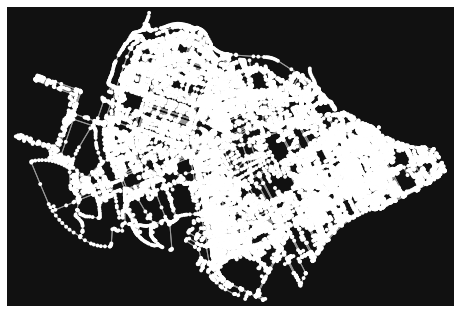

In [15]:
fig, ax = ox.plot_graph(G)

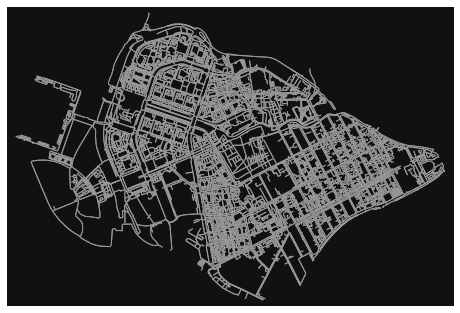

In [16]:
fig = ox.plot_graph(G, node_size=0)

In [17]:
tags = {"highway": "bus_stop"}
bus_stop_1 = ox.geometries_from_place(place, tags)

# bus_stop_1 = bus_stop_1['geometry']
bus_stop_1 = bus_stop_1.to_crs(32636)

In [18]:
bus_stop_1['id'] = range(1, len(bus_stop_1) + 1)

In [19]:
bus_stop_1

bench  bus   highway  lit  \
element_type osmid                                  
node         380729632     no  yes  bus_stop  yes   
             496765393    yes  yes  bus_stop  NaN   
             496765395    yes  yes  bus_stop  NaN   
             496765396    yes  yes  bus_stop  NaN   
             496765398    yes  yes  bus_stop  NaN   
...                       ...  ...       ...  ...   
             9156019891   NaN  yes  bus_stop  NaN   
             9156019893   NaN  yes  bus_stop  NaN   
             9156020944   NaN  yes  bus_stop  NaN   
             9156020948   NaN  yes  bus_stop  NaN   
             9191827136   NaN  yes  bus_stop  NaN   

                                                                      name  \
element_type osmid                                                           
node         380729632                                    Биржевая площадь   
             496765393   Новосмоленская набережная (улица Кораблестроит...   
             496765395                           Новосмоленская набережная   
             496765396                                    Мичманская улица   
             496765398                                    Мичманская улица   
...                                                                    ...   
             9156019891                                 24-25-я линии В.О.   
             9156019893                                 18-19-я линии В.О.   
             9156020944                                        Косая линия   
             9156020948                                 24-25-я линии В.О.   
             9191827136                          гостиница «Прибалтийская»   

                             name:de          name:en  \
element_type osmid                                      
node         380729632   Börsenplatz  Exchange Square   
             496765393           NaN              NaN   
             496765395           NaN              NaN   
             496765396           NaN              NaN   
             496765398           NaN              NaN   
...                              ...              ...   
             9156019891          NaN              NaN   
             9156019893          NaN              NaN   
             9156020944          NaN              NaN   
             9156020948          NaN              NaN   
             9191827136          NaN              NaN   

                                           name:ru public_transport shelter  \
element_type osmid                                                            
node         380729632            Биржевая площадь         platform      no   
             496765393                         NaN         platform     yes   
             496765395   Новосмоленская набережная         platform     yes   
             496765396            Мичманская улица         platform     yes   
             496765398            Мичманская улица         platform     NaN   
...                                            ...              ...     ...   
             9156019891                        NaN         platform     NaN   
             9156019893                        NaN         platform     NaN   
             9156020944                        NaN         platform     NaN   
             9156020948                        NaN         platform     NaN   
             9191827136                        NaN         platform     NaN   

                         ...  bin covered tram note share_taxi  \
element_type osmid       ...                                     
node         380729632   ...  NaN     NaN  NaN  NaN        NaN   
             496765393   ...  yes     NaN  NaN  NaN        NaN   
             496765395   ...  yes     NaN  NaN  NaN        NaN   
             496765396   ...  yes     NaN  NaN  NaN        NaN   
             496765398   ...  yes     yes  NaN  NaN        NaN   
...                      ...  ...     ...  ...  ...        ...   
             91560198

In [20]:
bus_stop_1[['id','geometry']]

id                        geometry
element_type osmid                                          
node         380729632     1  POINT (349492.500 6648256.318)
             496765393     2  POINT (344610.889 6649234.267)
             496765395     3  POINT (344486.586 6649009.432)
             496765396     4  POINT (344361.936 6648633.055)
             496765398     5  POINT (344436.065 6648726.390)
...                      ...                             ...
             9156019891  184  POINT (346850.577 6647045.818)
             9156019893  185  POINT (347596.842 6646951.169)
             9156020944  186  POINT (347124.399 6647162.144)
             9156020948  187  POINT (346859.080 6647025.887)
             9191827136  188  POINT (344477.012 6648037.501)

[188 rows x 2 columns]

In [21]:
nearest_nodes_array = np.array(ox.distance.nearest_nodes(G, bus_stop_1['geometry'].x, bus_stop_1['geometry'].y, return_dist=True)).T

In [22]:
bus_stop_1 = bus_stop_1.assign(**{"gr_nn":nearest_nodes_array[:, 0], "distance":nearest_nodes_array[:, 1]}).astype({'gr_nn':np.int64})

In [23]:
print(type(bus_stop_1['gr_nn']))

<class 'pandas.core.series.Series'>


In [24]:
def make_iso_polys(G, trip_time, bus_stop_1, edge_buff=25, node_buff=50, infill=True):
  
    for index, row in bus_stop_1.iterrows():
        node = row['gr_nn']
        subgraph = nx.ego_graph(G, node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': subgraph.nodes()}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        bus_stop_1.loc[index, 'iso_geom'] = new_iso
    return bus_stop_1

Построили изохроны, которые находятся в 5 минутах от остановок

In [25]:
trip_time = 5  

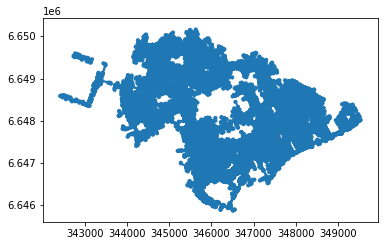

In [26]:
isochrone_polys_5 = make_iso_polys(G, trip_time, bus_stop_1, edge_buff=25, node_buff=50, infill=True)
isochrone_polys_5 = isochrone_polys_5.drop(columns=['geometry'], axis = 1) 
isochrone_polys_5= isochrone_polys_5.rename(columns={'iso_geom':'geometry'})
isochrone_polys_5.plot()
isochrone_polys_5_new = isochrone_polys_5[['geometry', 'name']]

In [76]:
isochrone_polys_5_new = isochrone_polys_5[['geometry', 'name']]

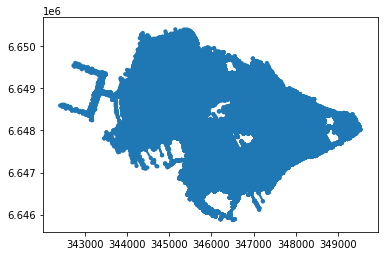

In [27]:
trip_time = 10
isochrone_polys_10 = make_iso_polys(G, trip_time, bus_stop_1, edge_buff=25, node_buff=50, infill=True)
isochrone_polys_10 = isochrone_polys_10.drop(columns=['geometry'], axis = 1) 
isochrone_polys_10 = isochrone_polys_10.rename(columns={'iso_geom':'geometry'})
isochrone_polys_10.plot()

In [77]:
isochrone_polys_10_new = isochrone_polys_10[['geometry', 'name']]

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


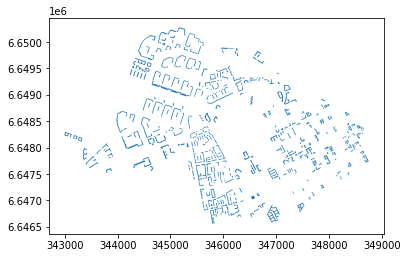

In [41]:
#скачиваем данные из osm
tags = {"building": "apartments"}
apartments = ox.geometries_from_place(place, tags)
apartments = apartments.to_crs(UTM_zone)
apartments.plot()

In [80]:
apartments_new = apartments[['geometry', 'addr:street']]

In [83]:
#дома в которые входят в изохроны 5 минут от остановок
apartments_5 = gpd.sjoin(apartments_new, isochrone_polys_5_new, how="inner", op='intersects')
#дома в которые входят в изохроны 10 минут от остановок
apartments_10 = gpd.sjoin(apartments_new, isochrone_polys_10_new, how="inner", op='intersects')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


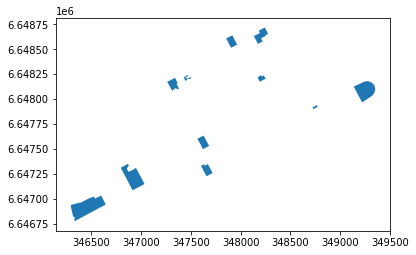

In [85]:
tags = {"amenity": "hospital"}
hospital = ox.geometries_from_place(place, tags)
hospital = hospital.to_crs(UTM_zone)
hospital.plot()

In [87]:
hospital_new = hospital[['geometry', 'addr:street']]

In [88]:
#больницы в которые входят в изохроны 5 минут от остановок
hospital_5 = gpd.sjoin(hospital_new, isochrone_polys_5_new, how="inner", op='intersects')
#больницы в которые входят в изохроны 10 минут от остановок
hospital_10 = gpd.sjoin(hospital_new, isochrone_polys_10_new, how="inner", op='intersects')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


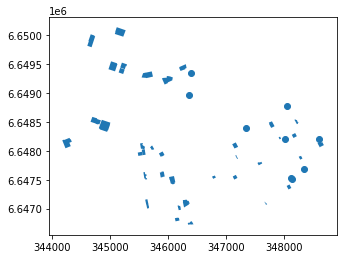

In [90]:
tags = {"amenity": "school"}
school = ox.geometries_from_place(place, tags)
school = school.to_crs(UTM_zone)
school.plot()

In [92]:
school_new = school[['geometry', 'name']]

In [ ]:
tags = {"amenity": "university"}
university = ox.geometries_from_place(place, tags)
university = university.to_crs(UTM_zone)
university.plot()
university

In [94]:
university_new = university[['geometry', 'name']]

In [95]:
study_new = school_new.append(university_new)

In [96]:
#больницы в которые входят в изохроны 5 минут от остановок
study_new_5 = gpd.sjoin(study_new, isochrone_polys_5_new, how="inner", op='intersects')
#больницы в которые входят в изохроны 10 минут от остановок
vstudy_new_10 = gpd.sjoin(study_new, isochrone_polys_10_new, how="inner", op='intersects')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
